In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
##import bambi as bmb

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.0.0b2


In [2]:
RANDOM_SEED = 1969
rng = np.random.default_rng(RANDOM_SEED)

In [3]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-bluish")

In [4]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)

# y = a + b*x
true_regression_line = true_intercept + true_slope * x

# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

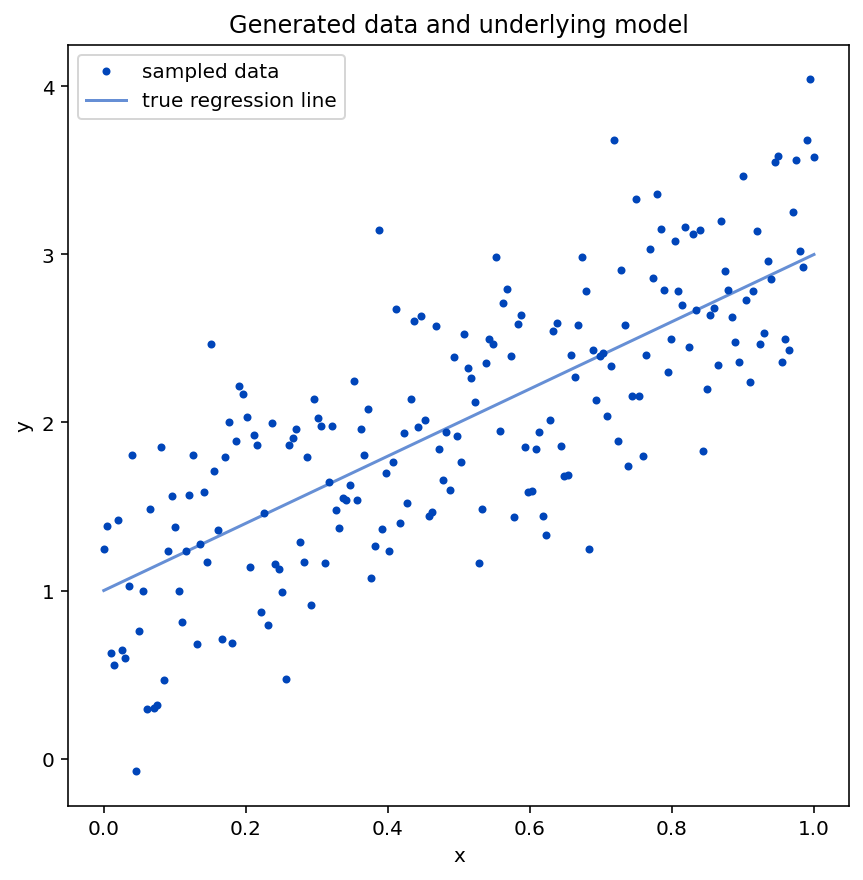

In [5]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, ".", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line")
plt.legend(loc=0);

In [6]:
with pm.Model() as model:
    # priors
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    alpha = pm.Normal("alpha", mu=0, sigma=20)
    beta = pm.Normal("beta", mu=0, sigma=20)

    # likelihood
    likelihood = pm.Normal("y", mu=alpha + beta * x, sigma=sigma, observed=y)

    # posterior
    posterior = pm.sample()
    
    # checks
    posterior_pred = pm.sample_posterior_predictive(posterior)
    prior_pred = pm.sample_prior_predictive()

/var/folders/ld/2drspt357ynfc_cynxr9bs7h0000gn/T/ipykernel_1775/1536751680.py:3: FutureWarning: The `testval` argument is deprecated; use `initval`.
  sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


array([<AxesSubplot:title={'center':'beta'}>,
       <AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

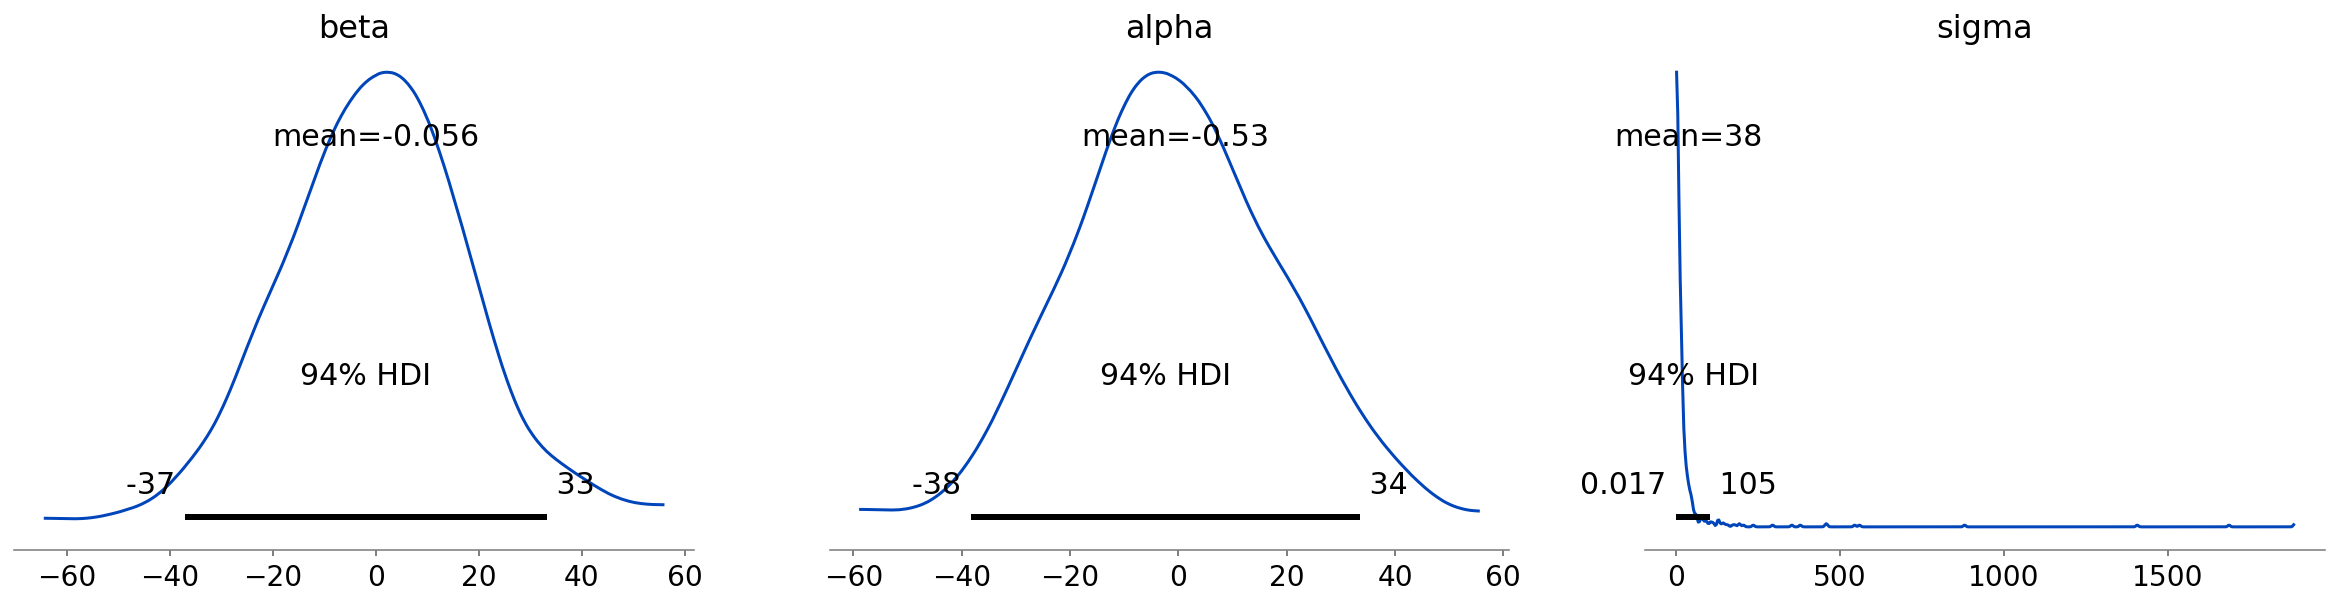

In [7]:
pm.plot_posterior(prior_pred.prior)

In [8]:
pm.summary(prior_pred.prior)

arviz - WARNING - Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,-0.056,18.374,-37.134,33.216,0.826,0.585,495.0,401.0,NaN
alpha,-0.529,19.293,-38.338,33.554,0.858,0.635,508.0,383.0,NaN
sigma,38.085,144.973,0.017,104.629,6.373,4.530,502.0,503.0,NaN


array([<AxesSubplot:title={'center':'sigma'}>,
       <AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta'}>], dtype=object)

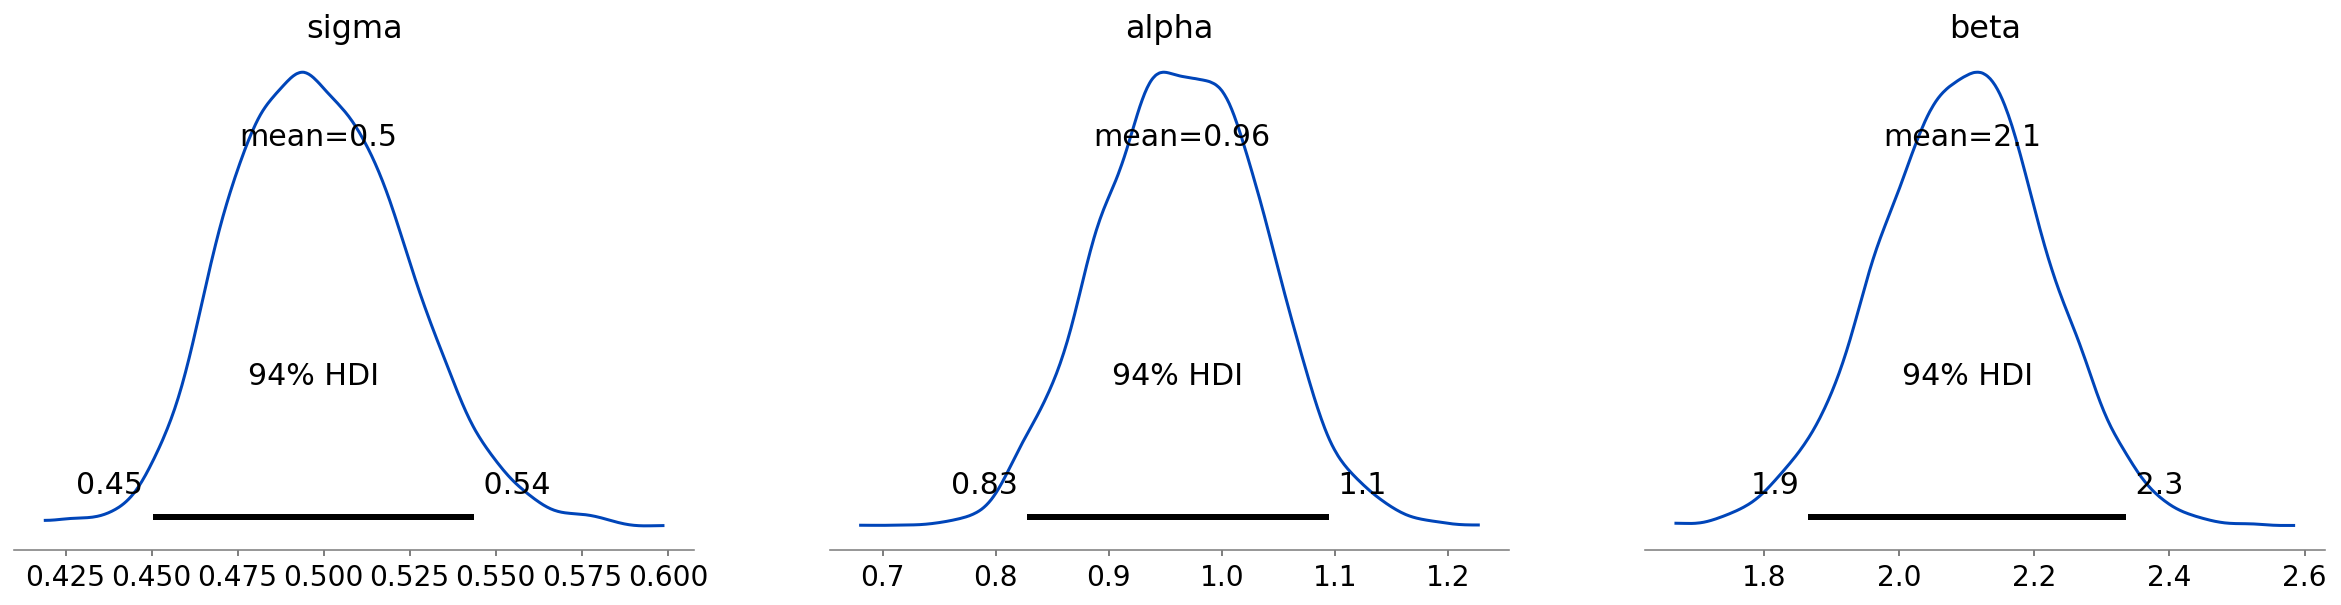

In [9]:
pm.plot_posterior(posterior)

In [10]:
pm.summary(posterior)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.498,0.025,0.450,0.544,0.001,0.000,1830.0,1829.0,1.0
alpha,0.964,0.072,0.828,1.095,0.002,0.001,1823.0,1766.0,1.0
beta,2.094,0.125,1.866,2.336,0.003,0.002,1816.0,1951.0,1.0
